In [3]:
import numpy as np
import matplotlib.pyplot as plt
from CMB_functions import *

In [4]:
#write this as a separate function
#Read file
CMB_spectra = np.genfromtxt('camb_45227314_lensedcls.dat')

# First column contains ell values, starting from ell=2
ell = CMB_spectra[:,0]

#Columns of data 
Dl_TT = CMB_spectra[:,1] 
Dl_EE = CMB_spectra[:,2] 
Dl_BB = CMB_spectra[:,3]
Dl_TE = CMB_spectra[:,4] 

#load in temperature maps
T=np.load('CMB_maps.npz')["arr_0"][0,:,:,:]
#load in QU maps
QU=np.load('CMB_maps.npz')["arr_0"][1:,:,:,:] #original unpadded, unedited Q/U maps (100 training maps) 
#test data
test_data=np.load('test_data.npz')["arr_0"][1:,:,:,:] #original unpadded, unedited Q/U maps (20 validation maps)
#loading in external mask that equals one & goes to zero at the edges
mask = np.load('mask_v0.npy')

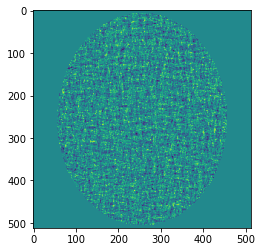

In [26]:
plt.imshow(QU[0,:,:,0]*(mask>0))

In [2]:
test_data=np.load('test_data.npz')["arr_0"][1:,:,:,:]

In [41]:
test_data.shape

(2, 512, 512, 20)

In [ ]:
mask_shape = np.zeros(QU.shape)
for i in range(QU.shape[-1]):
    for j in range(QU.shape[0]):
        mask_shape[j,:,:,i]=mask[:,:]

In [37]:
#this block creates training data of square root of input (nonlinear path) for the mask (gradual mask)
#create mask with same shape as QU
mask_shape = np.zeros(QU.shape)
for i in range(QU.shape[-1]):
    for j in range(QU.shape[0]):
        mask_shape[j,:,:,i]=np.sqrt(mask)

#mask QU maps with regular mask
QU_mask = np.zeros(QU.shape)
for i in range (QU.shape[-1]):
    QU_mask[:,:,:,i] = QU[:,:,:,i]*mask

#concatenate QU_mask and mask_shape, transpose this to have (batches,pix,pix,Q/U)
QU_conc = np.transpose(np.concatenate((QU_mask,mask_shape)),(3,1,2,0))
#pad the maps and save
QU_sqrt = np.pad(QU_conc,((0,0),(512,512),(512,512),(0,0)),mode='constant')
np.savez("QU_sqrt",QU_sqrt)

In [36]:
#this block creates training data of square root of input (nonlinear path) for the mask with a binary mask
#create mask with same shape as QU
mask_shape = np.zeros(QU.shape)
for i in range(QU.shape[-1]):
    for j in range(QU.shape[0]):
        mask_shape[j,:,:,i]=np.sqrt(mask)

#mask QU maps with binary mask
QU_mask = np.zeros(QU.shape)
for i in range (QU.shape[-1]):
    QU_mask[:,:,:,i] = QU[:,:,:,i]*(mask>0)

#concatenate QU_mask and mask_shape, transpose this to have (batches,pix,pix,Q/U)
QU_conc = np.transpose(np.concatenate((QU_mask,mask_shape)),(3,1,2,0))
#pad the maps and save
QU_binary = np.pad(QU_conc,((0,0),(512,512),(512,512),(0,0)),mode='constant')
np.savez("QU_binary",QU_binary)

In [3]:
#creating square root of input of the validation data (nonlinear path) for the mask
#create mask with same shape as QU
mask_shape = np.zeros(test_data.shape)
for i in range(test_data.shape[-1]):
    for j in range(test_data.shape[0]):
        mask_shape[j,:,:,i]=np.sqrt(mask)

#mask QU maps with regular mask
QU_mask = np.zeros(test_data.shape)
for i in range (test_data.shape[-1]):
    QU_mask[:,:,:,i] = test_data[:,:,:,i]*mask

#concatenate QU_mask and mask_shape, transpose this to have (batches,pix,pix,Q/U)
QU_conc = np.transpose(np.concatenate((QU_mask,mask_shape)),(3,1,2,0))
#pad the maps and save
sqrt_valid = np.pad(QU_conc,((0,0),(512,512),(512,512),(0,0)),mode='constant')
np.savez("sqrt_valid",sqrt_valid) #saving as "sqrt_valid" or validation set for sqrt mask set

In [37]:
#creating square root of input of the validation data (nonlinear path) for the binary mask
#create mask with same shape as QU
mask_shape = np.zeros(test_data.shape)
for i in range(test_data.shape[-1]):
    for j in range(test_data.shape[0]):
        mask_shape[j,:,:,i]=np.sqrt(mask)

#mask QU maps with regular mask
QU_mask = np.zeros(test_data.shape)
for i in range (test_data.shape[-1]):
    QU_mask[:,:,:,i] = test_data[:,:,:,i]*(mask>0)

#concatenate QU_mask and mask_shape, transpose this to have (batches,pix,pix,Q/U)
QU_conc = np.transpose(np.concatenate((QU_mask,mask_shape)),(3,1,2,0))
#pad the maps and save
binary_valid = np.pad(QU_conc,((0,0),(512,512),(512,512),(0,0)),mode='constant')
np.savez("binary_valid",binary_valid) #saving as "binary_valid" or validation set for sqrt mask set

In [ ]:
#test data set
QU_test = np.zeros(test_data.shape)
for i in range (test_data.shape[-1]):
    QU_test[:,:,:,i]=test_data[:,:,:,i]*mask

In [ ]:
#plot_map(QU_input[0,:,:,0],'Q Map (unfiltered)',cbarlabel='\u03BCK')
#plot_map(QU_input[1,:,:,0],'U Map (unfiltered)',cbarlabel='\u03BCK')
#plot_map(QU_truth[0,:,:,0],'Q Map (filtered)',cbarlabel='\u03BCK')
#plot_map(QU_truth[1,:,:,0],'U Map (filtered)',cbarlabel='\u03BCK')

In [ ]:
QU_input = np.zeros(QU.shape)
QU_truth = np.zeros(QU.shape)
for i in range(QU.shape[-1]):
    QU_input[:,:,:,i]=QU[:,:,:,i]*mask
    QU_truth[:,:,:,i]=generate_true_QU(QU[0,:,:,i],QU[1,:,:,i])

In [6]:
training_set=np.load("training_set.npz")["arr_0"] #(100,1536,1536,4)

In [7]:
training_set.shape

(100, 1536, 1536, 4)

In [19]:
(np.transpose(QU,(3,1,2,0))[:,:,:,0]*mask).shape

(2, 512, 512)

In [14]:
unpadded_QU = np.zeros((100,512,512,2))
unpadded_QU = training_set[:,512:1024,512:1024,0:2]

In [27]:
QU_sqrtmask_truth = np.zeros(unpadded_QU.shape)
for i in range (100):
    QU_sqrtmask_truth[i,:,:,:] = np.transpose(generate_true_QU_sqrtmask(unpadded_QU[i,:,:,0],unpadded_QU[i,:,:,1]),(1,2,0))

In [33]:
test_set=np.load("test_set.npz")["arr_0"]
print(test_set.shape)
print(test_data.shape)

(20, 1536, 1536, 4)
(2, 512, 512, 20)


In [36]:
unpadded_QU_test = np.zeros((20,512,512,2))
unpadded_QU_test = np.transpose(test_data,(3,1,2,0))

QU_sqrtmask_test_truth=np.zeros((20,512,512,2))
for i in range(20):
    QU_sqrtmask_test_truth[i,:,:,:] = np.transpose(generate_true_QU_sqrtmask(unpadded_QU_test[i,:,:,0],unpadded_QU_test[i,:,:,1]),(1,2,0))

In [38]:
np.savez("test_truth_sqrtmask",QU_sqrtmask_test_truth)

In [29]:
np.savez("truth_sqrtmask",QU_sqrtmask_truth)

In [ ]:
QU_training=np.transpose(np.concatenate((QU_input,mask_shape)),(3,1,2,0))
QU_predict=np.transpose(QU_truth,(3,1,2,0))
training_set=np.pad(QU_training,((0,0),(512,512),(512,512),(0,0)),mode='constant')

In [ ]:
#function!
QU_training=np.transpose(np.concatenate((QU_input,mask_shape)),(3,1,2,0))
QU_predict=np.transpose(QU_truth,(3,1,2,0))
training_set=np.pad(QU_training,((0,0),(512,512),(512,512),(0,0)),mode='constant')

In [ ]:
#test set is testing data padded
QU_testing=np.transpose(np.concatenate((QU_test,mask_shape[:,:,:,0:20])),(3,1,2,0))
test_set=np.pad(QU_testing,((0,0),(512,512),(512,512),(0,0)),mode='constant')

In [ ]:
DlTT, DlEE, DlBB, DlTE, DlEB, DlTB=power_spectra(T[:,:,0],QU_input[0,:,:,0],QU_input[1,:,:,0])
plot_power(DlBB,ell,Dl_BB,'BB Input')

In [ ]:
DlTT, DlEE, DlBB, DlTE, DlEB, DlTB=power_spectra(T[:,:,0],QU_truth[0,:,:,0],QU_truth[1,:,:,0])
plot_power(DlBB,ell,Dl_BB,'BB Truth')

In [ ]:
#load in data
#training sets: (100,1536,1536,4)
QU_training=np.load('QU_training.npz')["arr_0"]
print(QU_training.shape)
QU_true=np.load('QU_predict.npz')["arr_0"]
print(QU_true.shape)
#test data: (20,512,512,2)
test_data=np.load('CMB_maps.npz')["arr_0"]
print(test_data.shape)

In [3]:
test_truth=np.load("test_truth.npz")["arr_0"] #masked validation truth maps 

In [ ]:
QU_sqrtmask_truth = np.zeros(unpadded_QU.shape)
for i in range (100):
    QU_sqrtmask_truth[i,:,:,:] = np.transpose(generate_true_QU_sqrtmask(unpadded_QU[i,:,:,0],unpadded_QU[i,:,:,1]),(1,2,0))

In [9]:
#generating QU unmasked training truth maps
QU_traintrue_UM = np.zeros((100,512,512,2))
for i in range (100):
    QU_traintrue_UM[i,:,:,:] = np.transpose(generate_true_QU_UM(QU[0,:,:,i],QU[1,:,:,i]),(1,2,0))

In [19]:
#generating QU unmasked validation truth maps 
QU_validtrue_UM = np.zeros((20,512,512,2))
for i in range (20):
    QU_validtrue_UM[i,:,:,:] = np.transpose(generate_true_QU_UM(test_data[0,:,:,i],test_data[1,:,:,i]),(1,2,0))

In [12]:
np.savez("QU_traintrue_UM",QU_traintrue_UM)

In [21]:
np.savez("QU_validtrue_UM",QU_validtrue_UM)

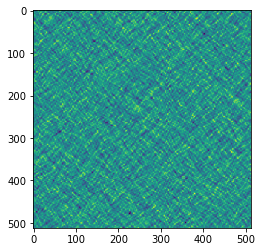

In [20]:
plt.imshow(QU_validtrue_UM[0,:,:,0])

In [16]:
QU_validtrue_UM.shape

(100, 512, 512, 2)

In [5]:
#smoothed truth maps with concentration on low ell of 200
QU_smooth_sig200 = np.zeros((100,512,512,2))
for i in range (100):
    QU_smooth_sig200[i,:,:,:] = np.transpose(generate_true_QU(QU[0,:,:,i],QU[1,:,:,i]),(1,2,0))

In [9]:
np.savez("mapdata/truth/QU_smooth_sig200",QU_smooth_sig200)

In [10]:
#smoothed validation truth maps with concentration on low ell of 200
QU_smooth_sig200_valid = np.zeros((20,512,512,2))
for i in range (20):
    QU_smooth_sig200_valid[i,:,:,:] = np.transpose(generate_true_QU(test_data[0,:,:,i],test_data[1,:,:,i]),(1,2,0))

In [12]:
np.savez("mapdata/truth_validation/QU_smooth_sig200_valid",QU_smooth_sig200_valid)

In [ ]:
QU_binary_mask=np.zeros((100,1536,1536,4))
binarymask=(QU_binary[:,:,:,2:4]>0)
QU_binary_mask[:,:,:,0:2]=QU_binary[:,:,:,0:2]
QU_binary_mask[:,:,:,2:4]=binarymask
np.savez("QU_binary_mask",QU_binary_mask)

In [4]:
binary_valid = np.load("binary_valid.npz")["arr_0"]
binary_valid_mask = np.zeros((20,1536,1536,4))
binary_valid_mask[:,:,:,0:2]=binary_valid[:,:,:,0:2]
binary_valid_mask[:,:,:,2:4]=(binary_valid[:,:,:,2:4]>0)

In [13]:
np.savez("binary_valid_mask",binary_valid_mask)

In [11]:
QU_traintrue_UM = np.load("QU_traintrue_UM.npz")["arr_0"]
QU_traintrue_bin = np.zeros((100,512,512,2))
for i in range(2):
    QU_traintrue_bin[:,:,:,i]=QU_traintrue_UM[:,:,:,i]*(mask>0)

In [19]:
np.savez("QU_traintrue_bin",QU_traintrue_bin)

In [20]:
QU_validtrue_UM = np.load("QU_validtrue_UM.npz")["arr_0"]
QU_validtrue_bin = np.zeros((20,512,512,2))
for i in range(2):
    QU_validtrue_bin[:,:,:,i]=QU_validtrue_UM[:,:,:,i]*(mask>0)

In [24]:
np.savez("QU_validtrue_bin",QU_validtrue_bin)

In [1]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
QU_validtrue_bin=np.load("QU_validtrue_bin.npz")["arr_0"]

In [6]:
from __future__ import division

def normalize_meanstd(a, axis=None): 
    # axis param denotes axes along which mean & std reductions are to be performed
    mean = np.mean(a, axis=axis, keepdims=True)
    std = np.sqrt(((a - mean)**2).mean(axis=axis, keepdims=True))
    return (a - mean) / std

standardized_images = normalize_meanstd(QU_validtrue_bin, axis=(1,2))

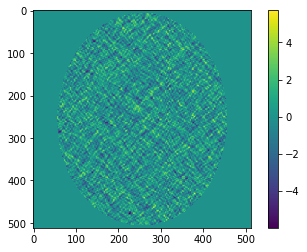

In [8]:
plt.imshow(standardized_images[0,:,:,0])
plt.colorbar()

In [19]:
np.amin(QU_validtrue_bin)

-1.3719911547704848

In [20]:
np.amin(standardized_images)

-6.53337042171954

In [13]:
np.ndarray.flatten(standardized_images[0,:,:,0]).shape

(262144,)

In [14]:
np.argmax(np.ndarray.flatten(standardized_images[0,:,:,0]))

220539